In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Step by step walktrough of how to use DeMethify with bedmethyl files (modkit output style)

Here are the different steps:
- Preprocessing:
    - Feature selection, choosing the n CpG sites of the reference matrix with the highest variance (see /preprocessing/preprocessing.ipynb)
    - Bed files intersection, making the CpG sites consistent across the reference and the samples (see /preprocessing/preprocessing.ipynb)

- Deconvolution

## DeMethify use cases

Once the bed files ready, we can finally use DeMethify:

In [2]:
## If demethify is not yet installed
#!pip install git+https://github.com/cortes-ciriano-lab/DeMethify

In [3]:
!demethify -h

usage: demethify [-h] --methfreq METHFREQ [METHFREQ ...] [--ref [REF]]
                 [--iterations ITERATIONS ITERATIONS] [--nbunknown NBUNKNOWN]
                 [--purity PURITY [PURITY ...]] [--termination TERMINATION]
                 [--init [INIT]] --outdir [OUTDIR] [--fillna]
                 [--ic IC [IC ...]] [--confidence CONFIDENCE CONFIDENCE]
                 [--plot] [--restart RESTART] [--seed SEED] [--noprint]
                 [--bedmethyl]

DeMethify - Partial reference-based Methylation Deconvolution

options:
  -h, --help            show this help message and exit
  --methfreq METHFREQ [METHFREQ ...]
                        Methylation frequency file path (values between 0 and
                        1)
  --ref [REF]           Methylation reference matrix file path
  --iterations ITERATIONS ITERATIONS
                        Numbers of iterations for outer and inner loops
                        (default without purity = 10000, 20, with purity= 100,
               

There are several use cases for DeMethify, first of all since we're dealing with bedmethyl files here we're gonna use the --bedmethyl flag to make things smoother. 

Here are different examples:

### Unsupervised case 

You can run DeMethify when you've got no reference in a totally unsupervised fashion. (There is no confidence interval for this option)

Here for example we choose 4 unknown cell types:

In [4]:
!demethify \
    --methfreq output_gen/sample{1..10}.bed \
    --nbunknown 4 \
    --outdir unsupervised \
    --bedmethyl \
    --plot

     
    ____                      __  __    _ ____     
   / __ \___  ____ ___  ___  / /_/ /_  (_) __/_  __
  / / / / _ \/ __ `__ \/ _ \/ __/ __ \/ / /_/ / / /
 / /_/ /  __/ / / / / /  __/ /_/ / / / / __/ /_/ / 
/_____/\___/_/ /_/ /_/\___/\__/_/ /_/_/_/  \__, /  
                                          /____/   

Creating directory /Users/mbourdim/Desktop/tfk/DeMethify/test/unsupervised to store results
All demethified! Results in /Users/mbourdim/Desktop/tfk/DeMethify/test/unsupervised
Plots generated in /Users/mbourdim/Desktop/tfk/DeMethify/test/unsupervised/plots


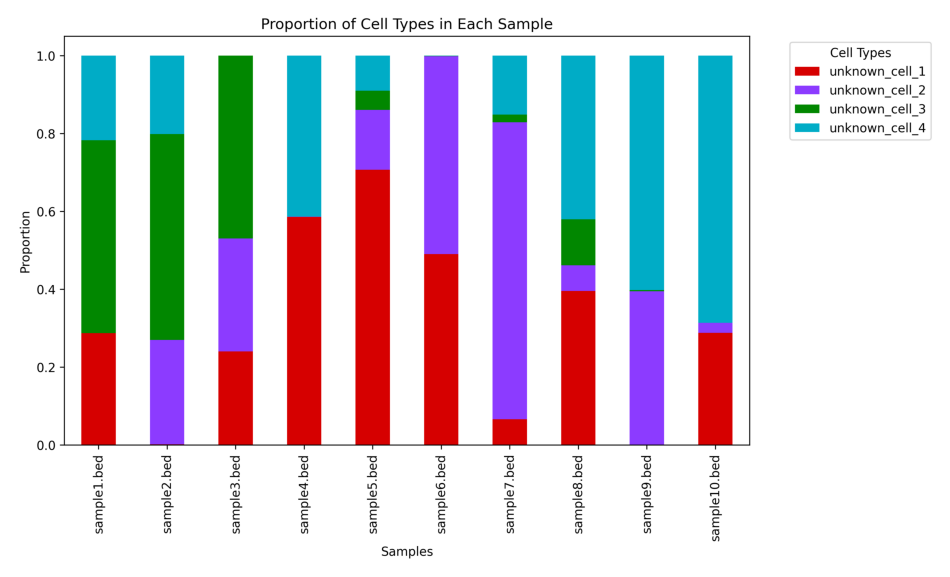

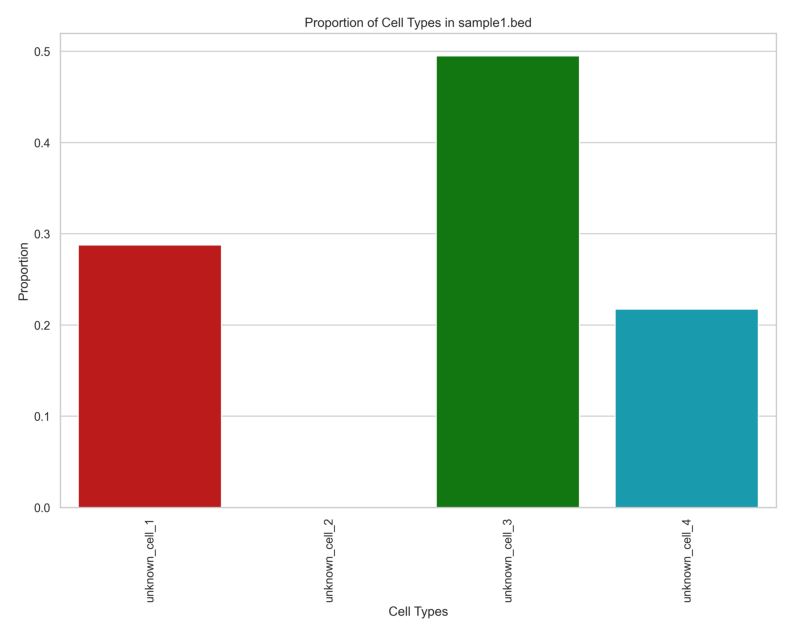

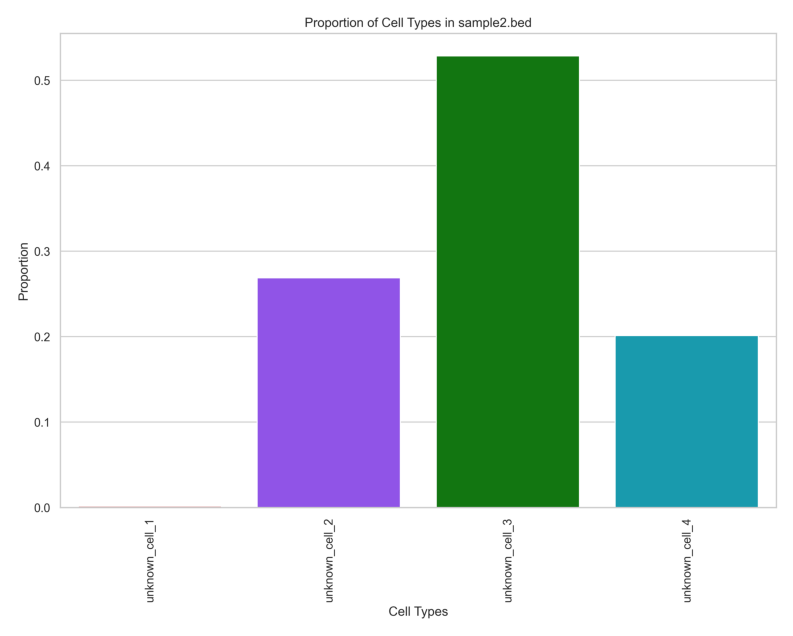

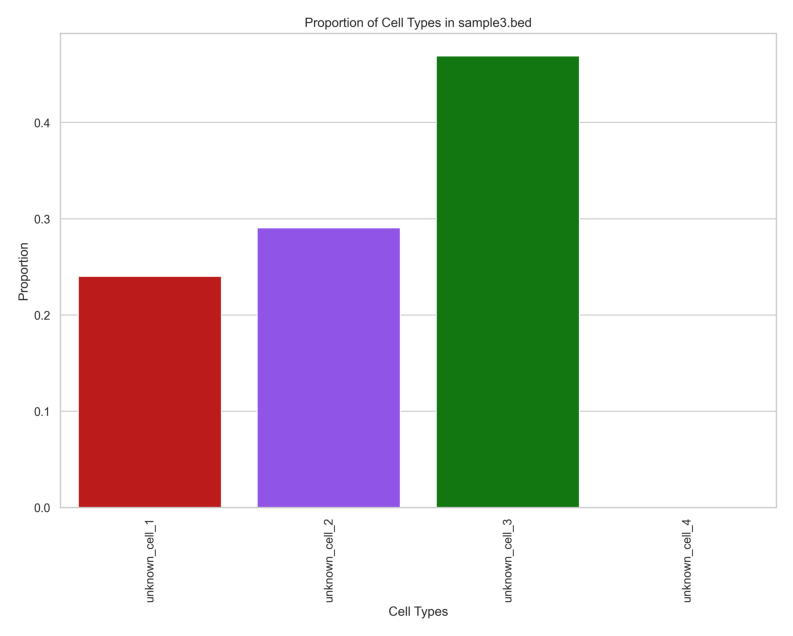

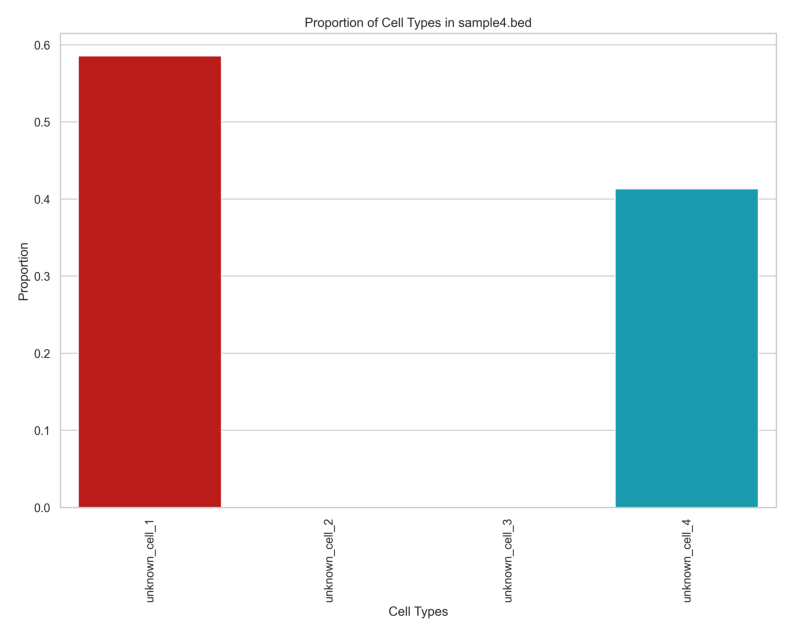

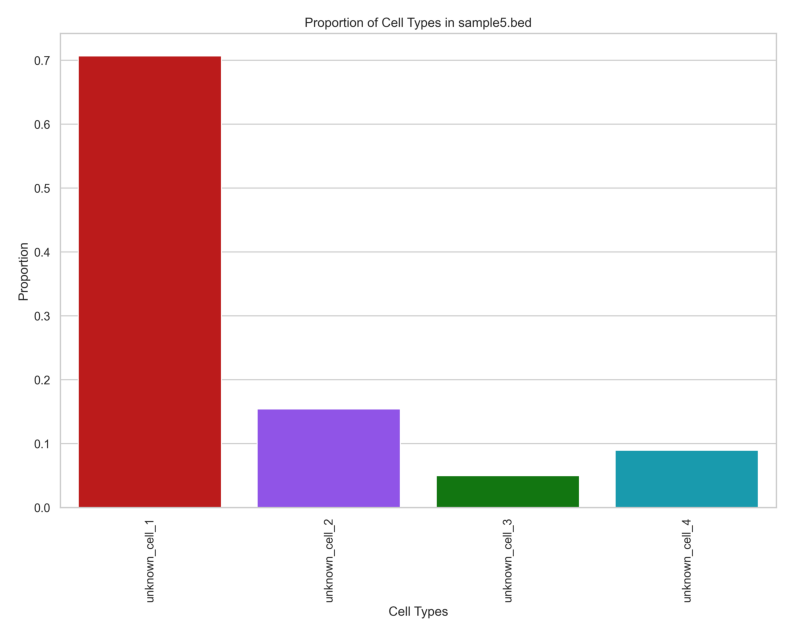

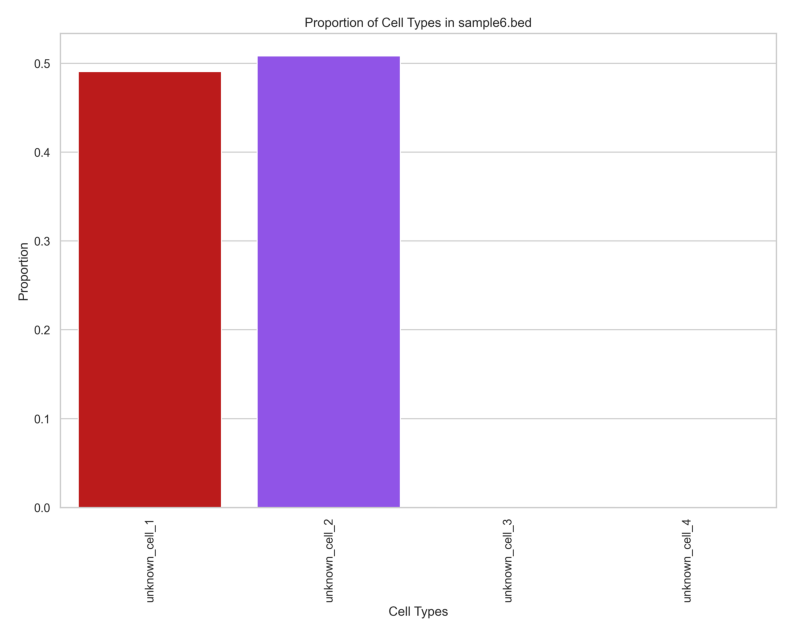

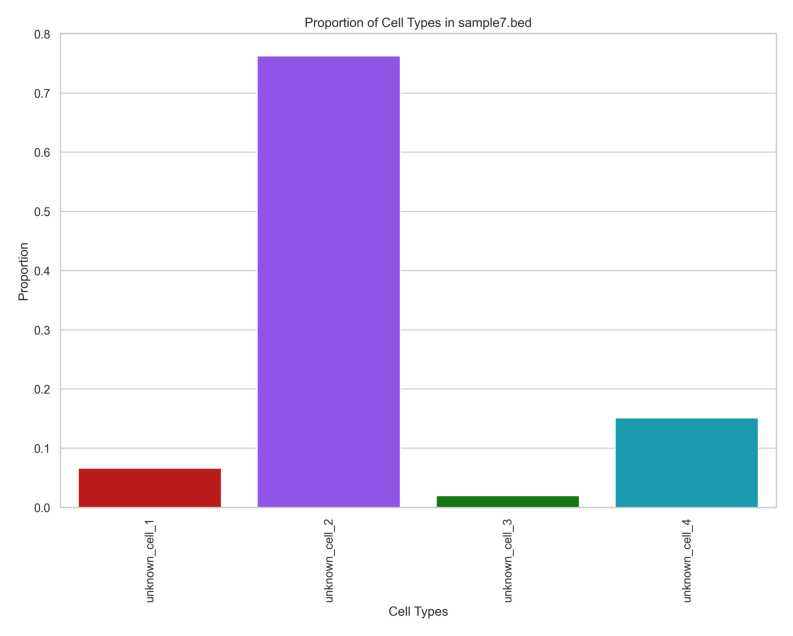

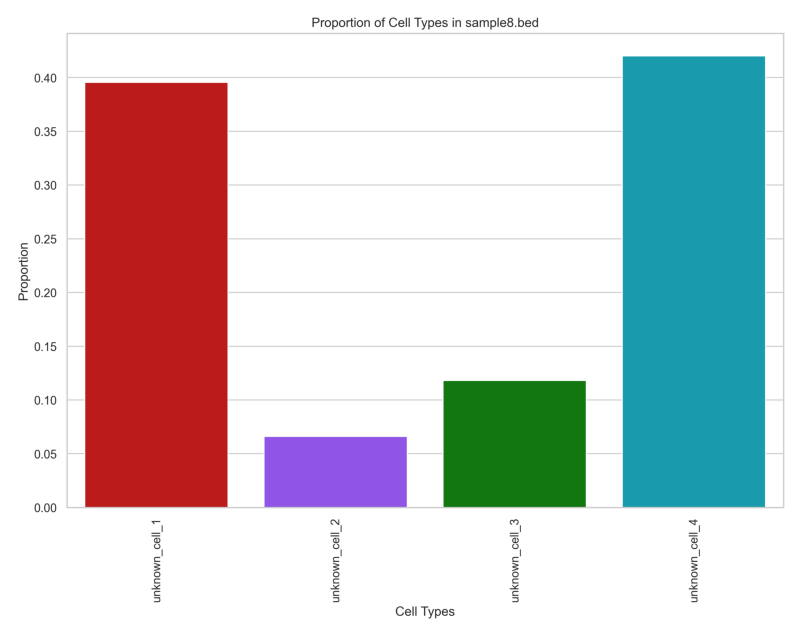

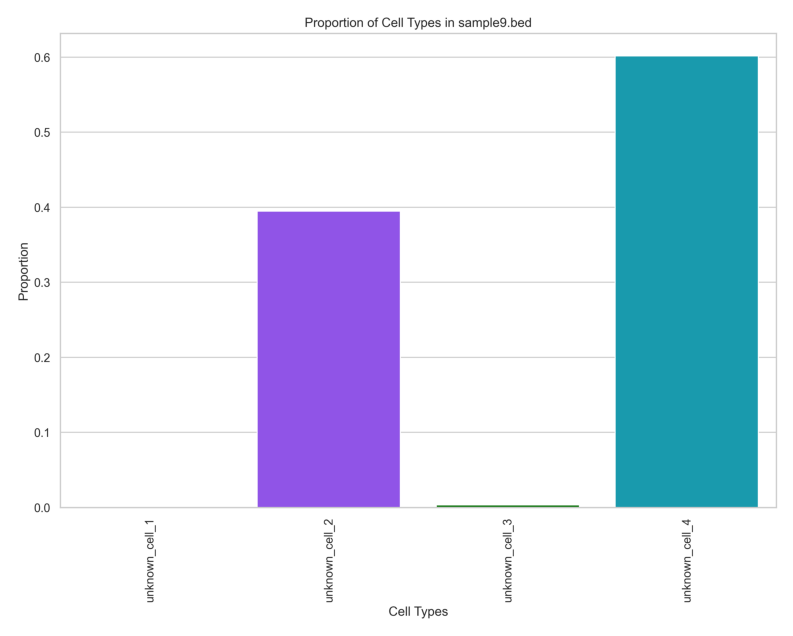

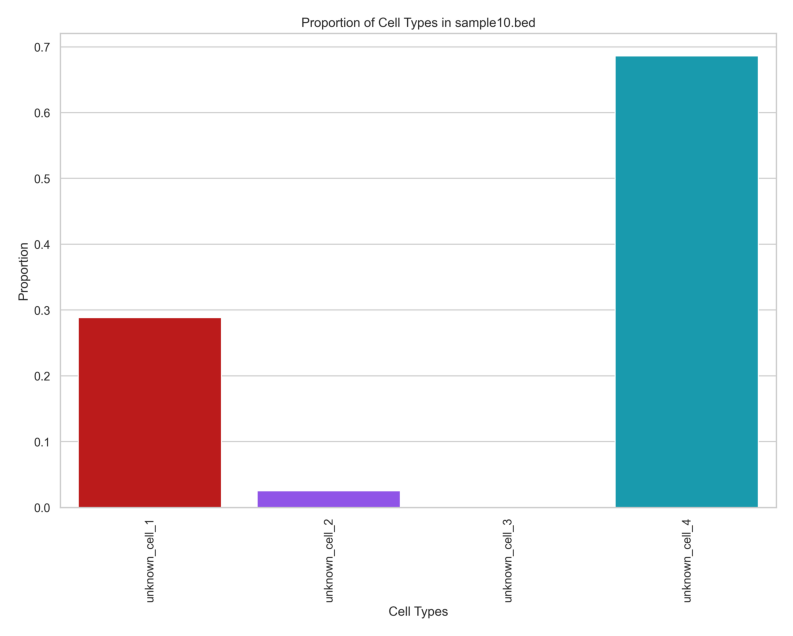

In [5]:
img = mpimg.imread('unsupervised/plots/proportions_stackedbar.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  
plt.show()

for i in range(10):
    img = mpimg.imread('unsupervised/plots/proportions_bar_sample' + str(i + 1) + '.png')
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

### Reference based

For example, if we want to use DeMethify as a reference-based algorithm, without estimating any unknown cell types we can:

In [6]:
!demethify \
    --ref output_gen/ref_matrix.bed \
    --methfreq \
    output_gen/sample{1..10}.bed \
    --bedmethyl \
    --outdir output_ref_based \
    --plot

     
    ____                      __  __    _ ____     
   / __ \___  ____ ___  ___  / /_/ /_  (_) __/_  __
  / / / / _ \/ __ `__ \/ _ \/ __/ __ \/ / /_/ / / /
 / /_/ /  __/ / / / / /  __/ /_/ / / / / __/ /_/ / 
/_____/\___/_/ /_/ /_/\___/\__/_/ /_/_/_/  \__, /  
                                          /____/   

Creating directory /Users/mbourdim/Desktop/tfk/DeMethify/test/output_ref_based to store results
All demethified! Results in /Users/mbourdim/Desktop/tfk/DeMethify/test/output_ref_based
Plots generated in /Users/mbourdim/Desktop/tfk/DeMethify/test/output_ref_based/plots


The --plot flag generates the following proportion estimates visualisation:

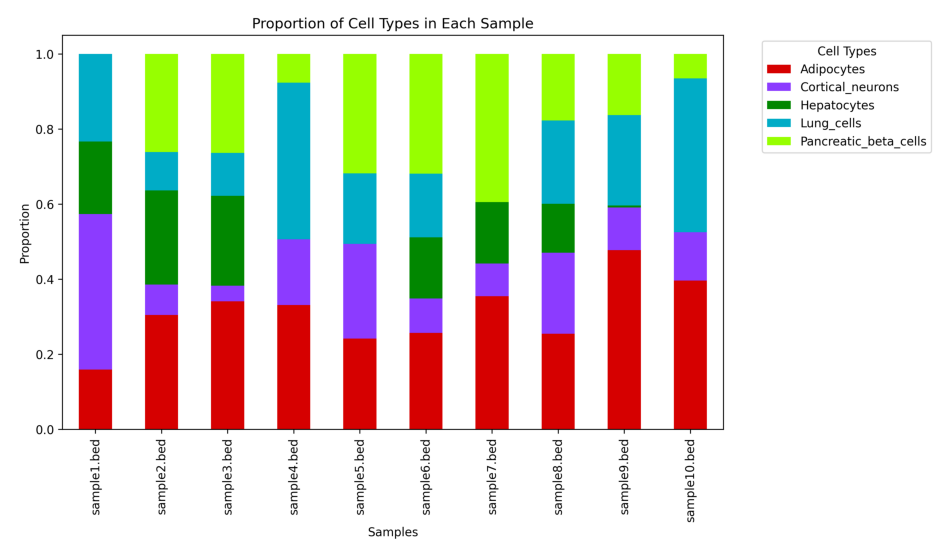

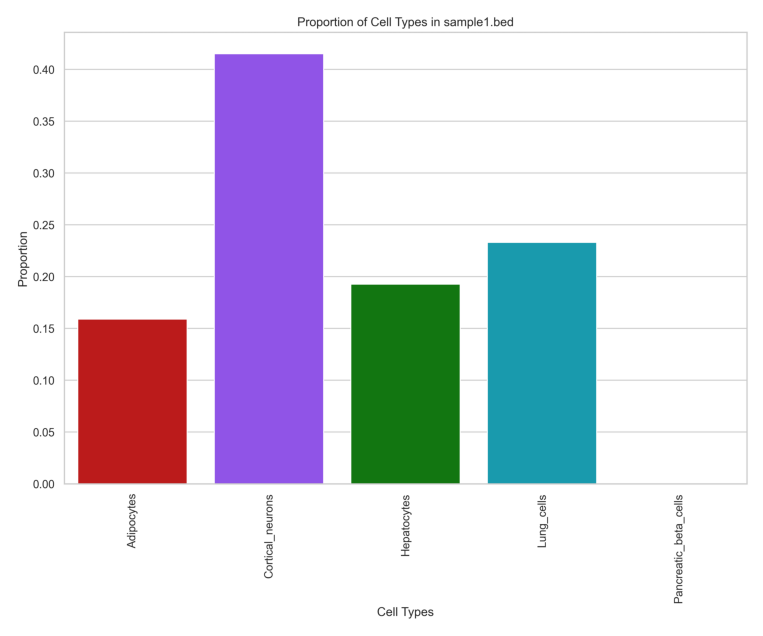

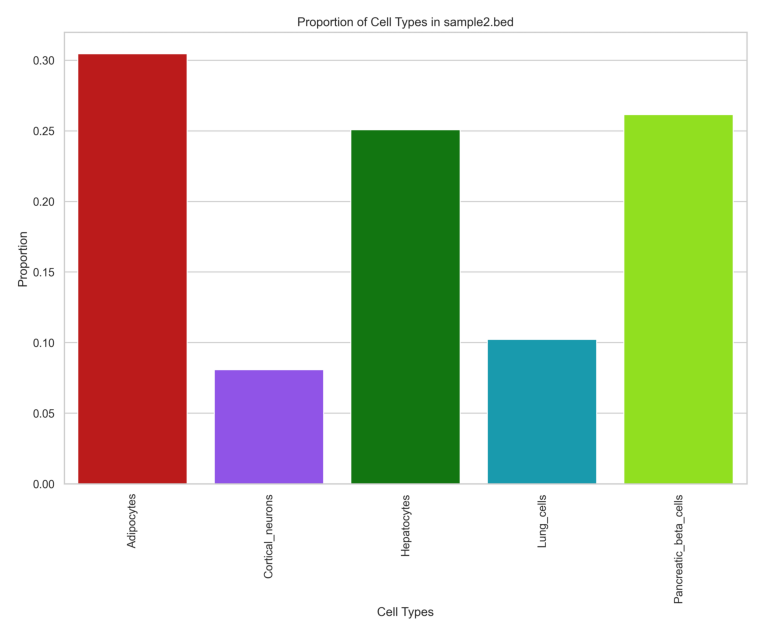

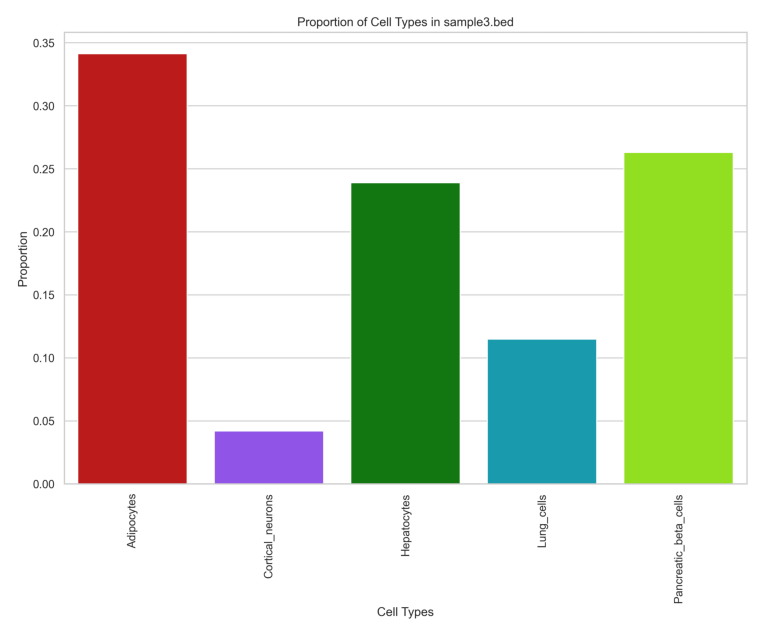

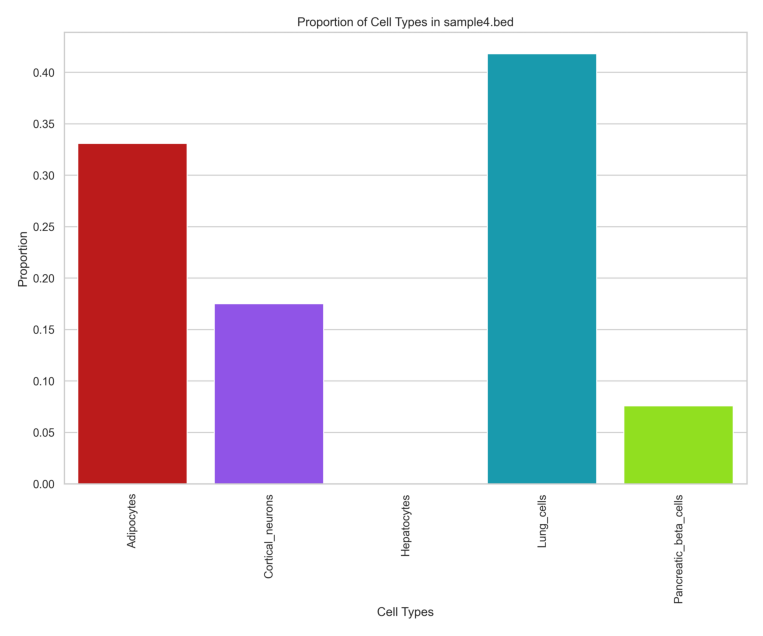

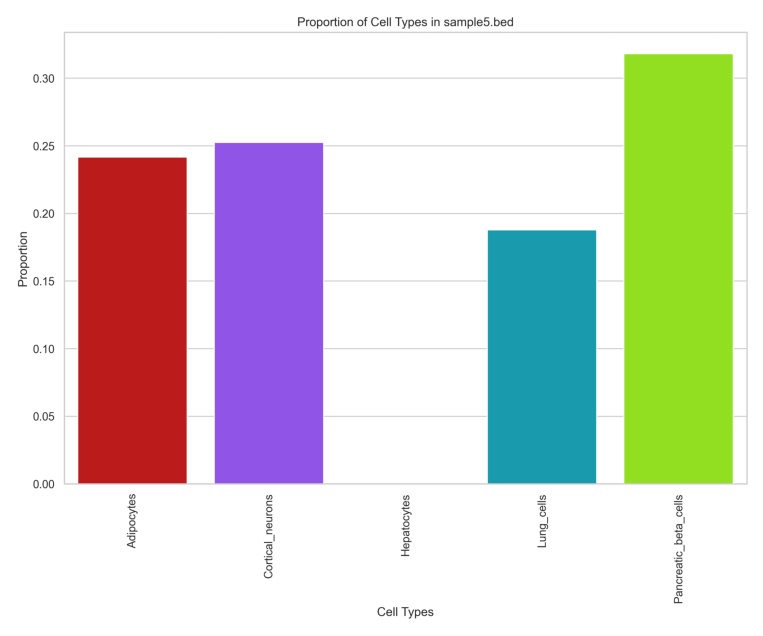

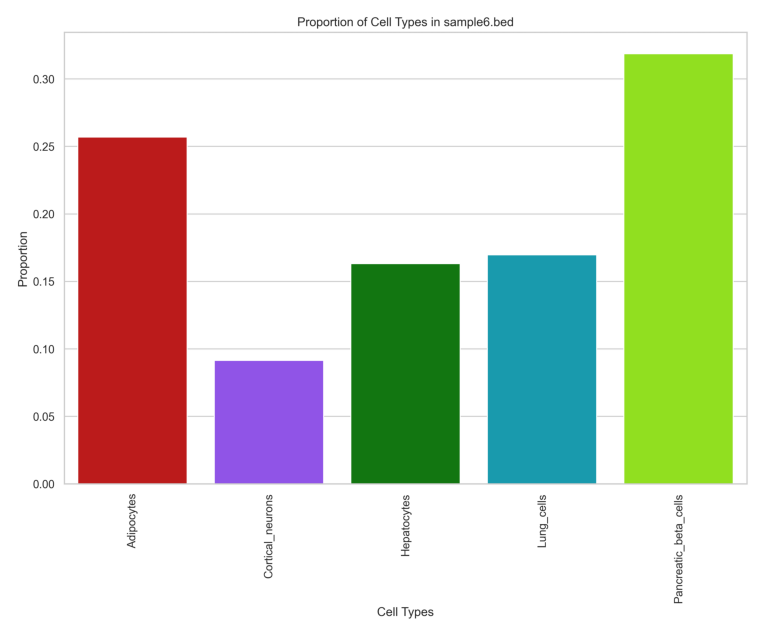

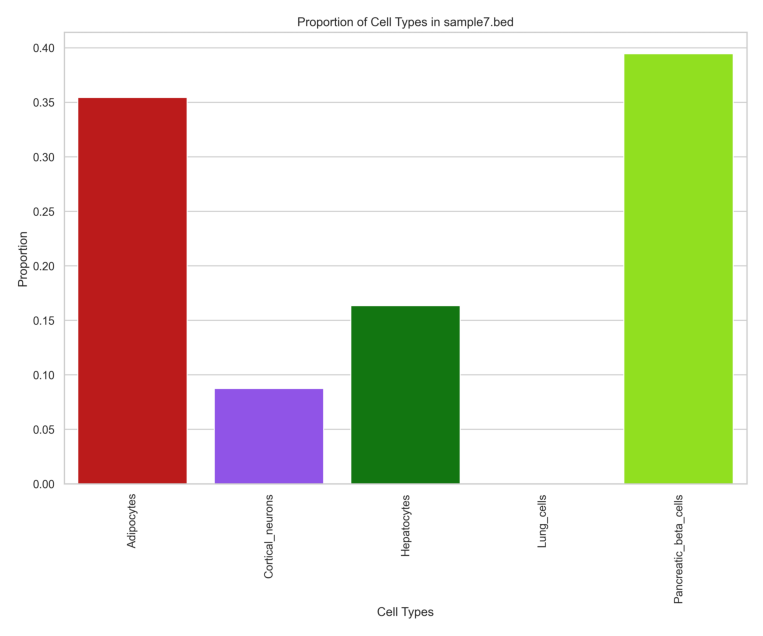

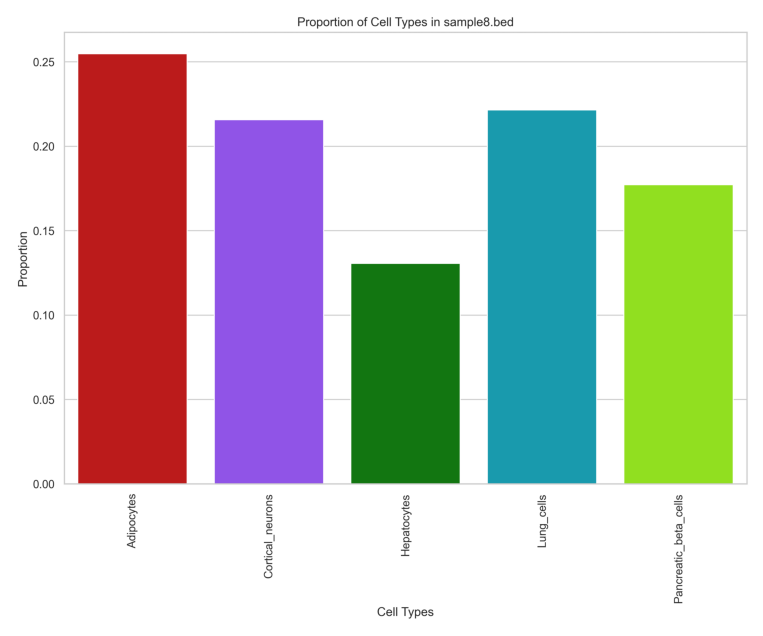

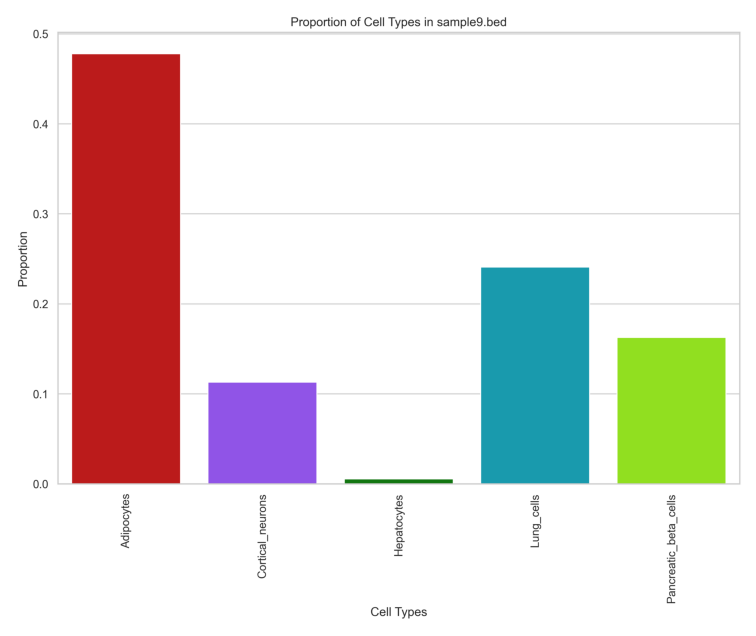

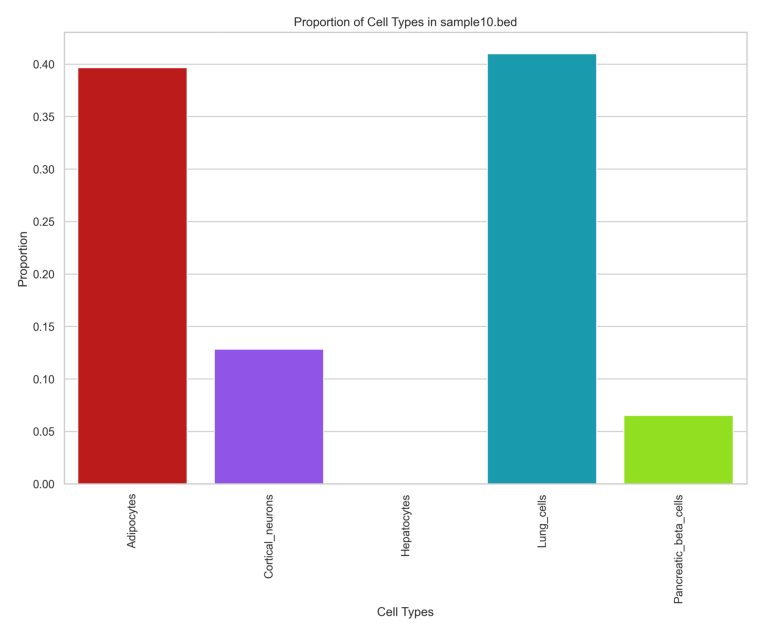

In [7]:
img = mpimg.imread('output_ref_based/plots/proportions_stackedbar.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  
plt.show()

for i in range(10):
    img = mpimg.imread('output_ref_based/plots/proportions_bar_sample' + str(i + 1) + '.png')
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

### Partial-reference based

We can also run DeMethify when we only know some cell types of the mixture.

We need to specify the number of unknown cell types that we want to estimate an DeMethify jointly estimates their methylation profiles and all of the known and unknown cell types proportions. 

The `--init` flag corresponds to the method of initialisation for the partial-reference based algorithm, there are 3 options:
- `uniform_`, where the methylation profile gets initialised with a uniform distribution and the proportion vector with a Dirichlet distribution
- `uniform`, where the methylation profile gets initialised with a uniform distribution and the proportion vector with the WLS with intercept supervised algorithm
- `beta`, where the methylation profile gets initialised with a beta distribution and the proportion vector with a Dirichlet distribution
- `ICA`, where the methylation profile gets initialised with Independent Component Analysis
- `SVD`, where the methylation profile gets initialised with Singular Value Decomposition

In most situations, the `uniform_` initialisation method, which is the default one, is recommended. 

In [8]:
!demethify \
    --ref output_gen/ref_matrix.bed \
    --methfreq \
    output_gen/sample{1..10}.bed \
    --bedmethyl \
    --nbunknown 1 \
    --outdir output_partial_ref \
    --plot

     
    ____                      __  __    _ ____     
   / __ \___  ____ ___  ___  / /_/ /_  (_) __/_  __
  / / / / _ \/ __ `__ \/ _ \/ __/ __ \/ / /_/ / / /
 / /_/ /  __/ / / / / /  __/ /_/ / / / / __/ /_/ / 
/_____/\___/_/ /_/ /_/\___/\__/_/ /_/_/_/  \__, /  
                                          /____/   

Creating directory /Users/mbourdim/Desktop/tfk/DeMethify/test/output_partial_ref to store results
All demethified! Results in /Users/mbourdim/Desktop/tfk/DeMethify/test/output_partial_ref
Plots generated in /Users/mbourdim/Desktop/tfk/DeMethify/test/output_partial_ref/plots


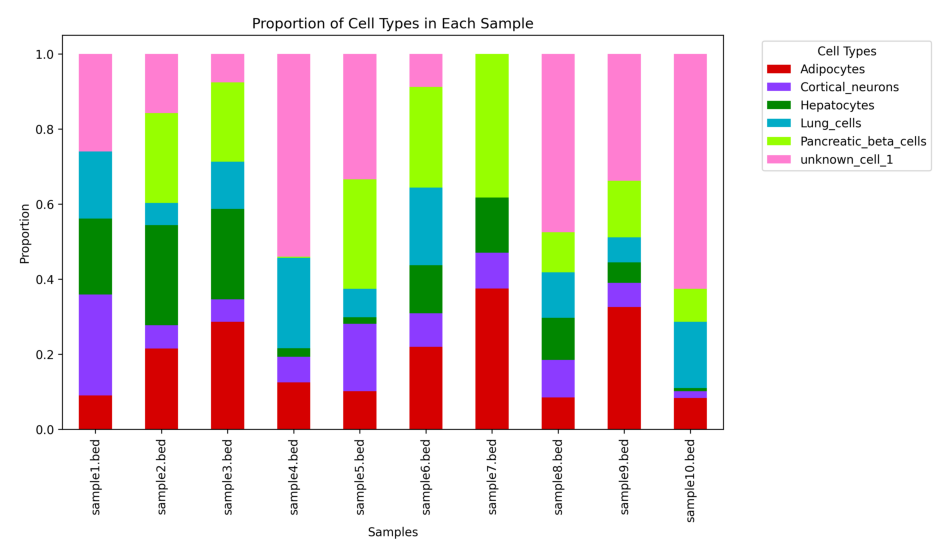

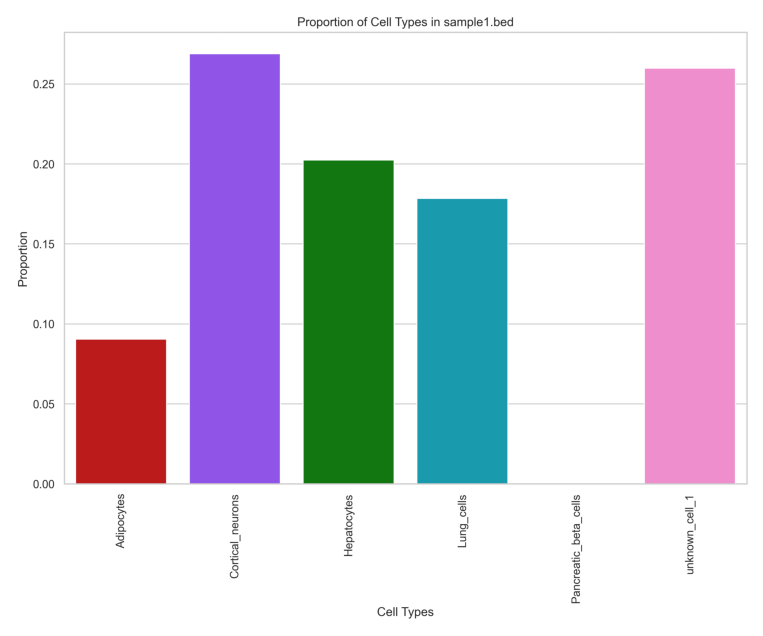

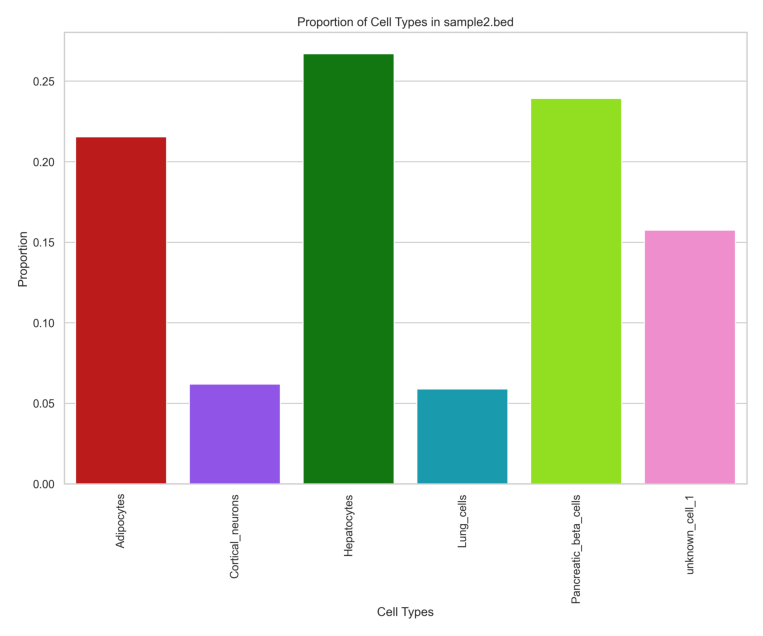

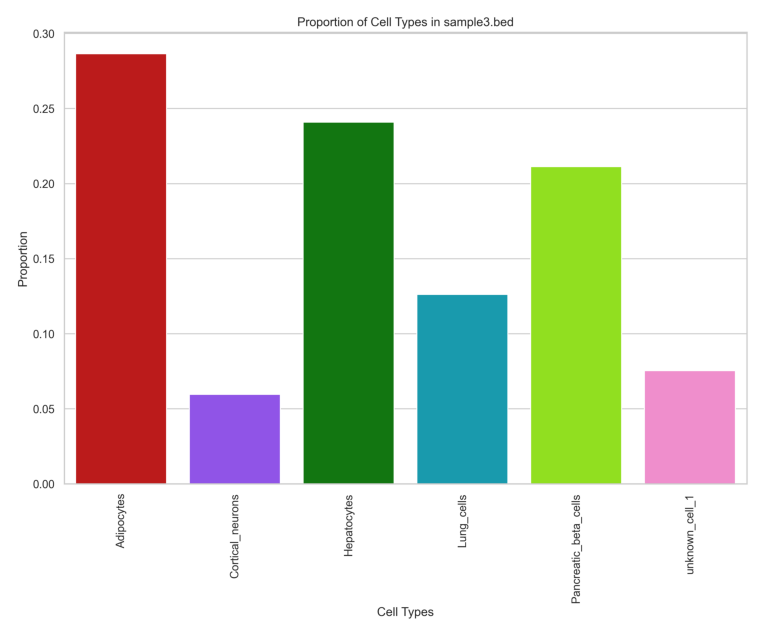

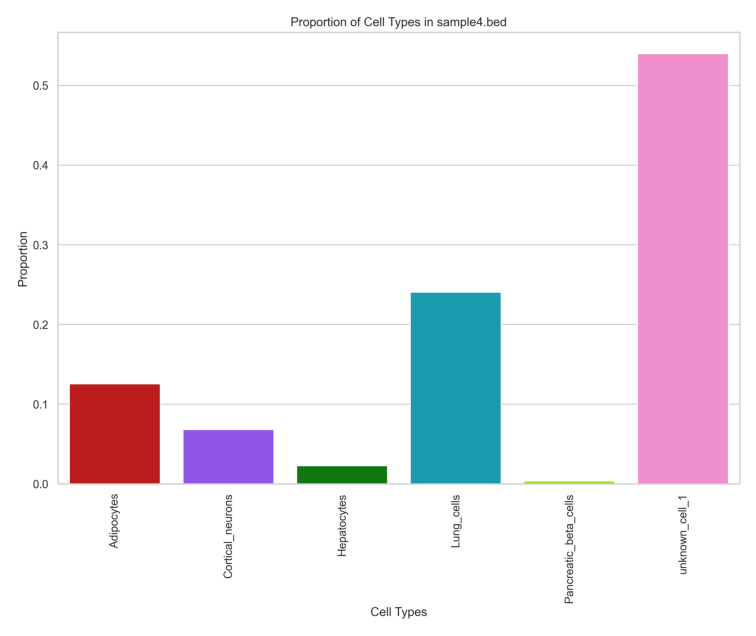

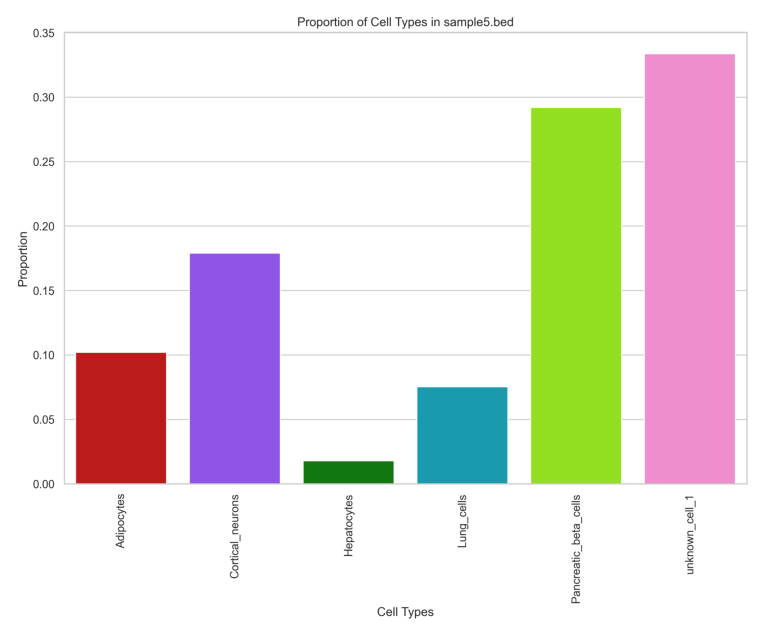

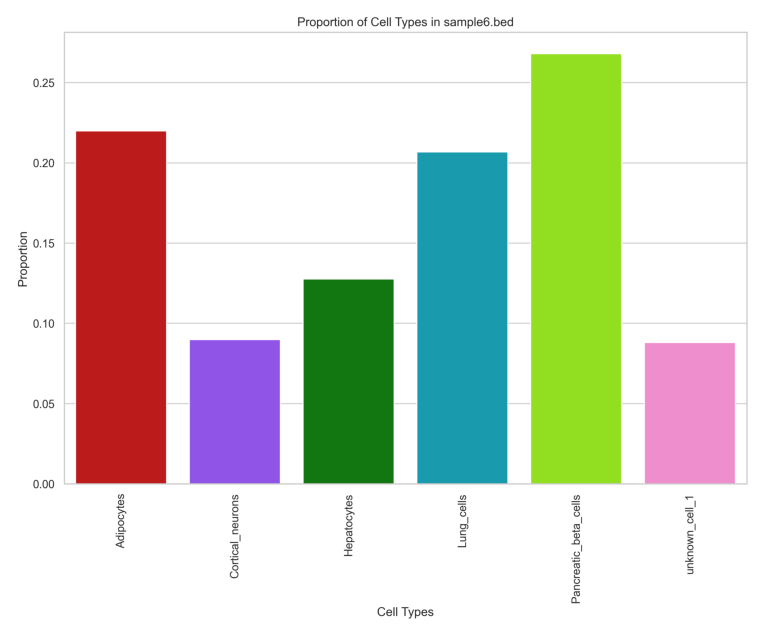

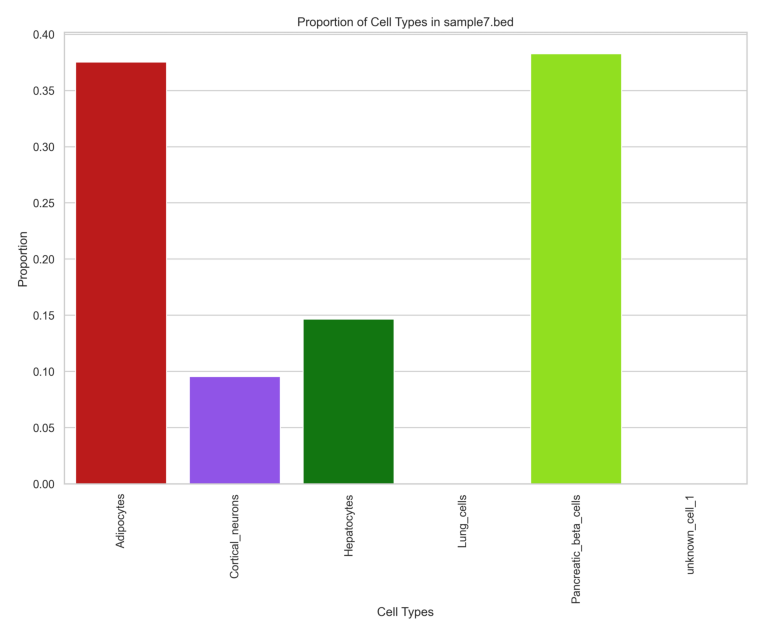

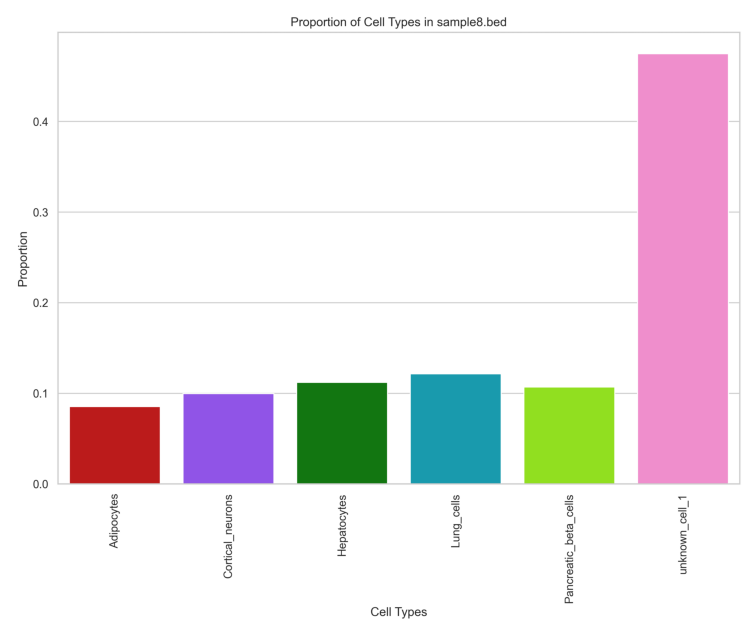

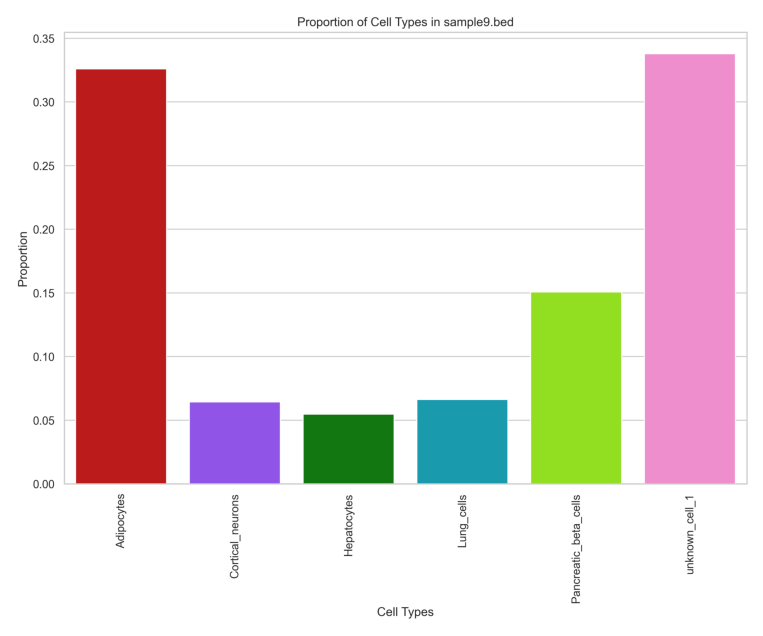

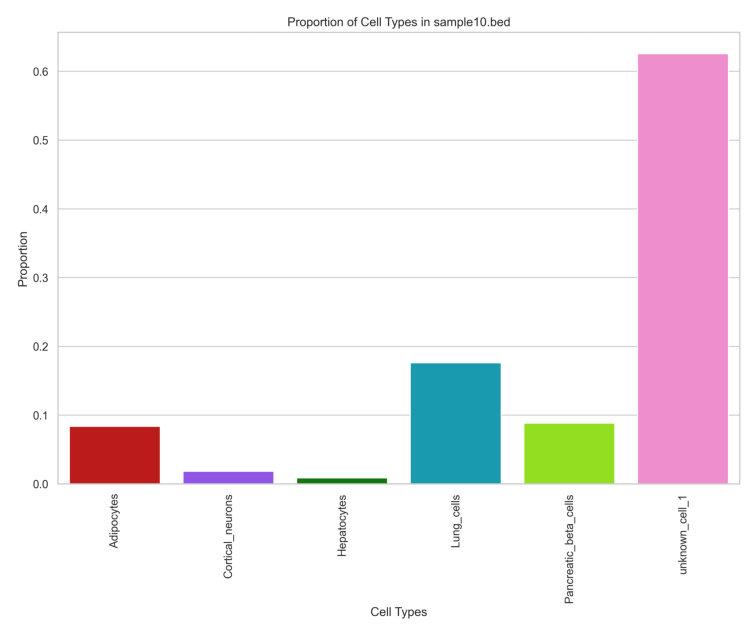

In [9]:
img = mpimg.imread('output_partial_ref/plots/proportions_stackedbar.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  
plt.show()

for i in range(10):
    img = mpimg.imread('output_partial_ref/plots/proportions_bar_sample' + str(i + 1) + '.png')
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

### Partial-reference based with purity information

We can run DeMethify when we've got purity (= 1 - unknown cells portion) information, it makes the proportions and methylation profiles estimation better. It also makes the optimisation problem identifiable for the one sample, one known cell type case. 

In [10]:
!demethify \
    --ref output_gen/ref_matrix.bed \
    --methfreq output_gen/sample{1..10}.bed \
    --nbunknown 1 \
    --purity 60 80 90 20 50 90 100 30 50 10 \
    --outdir purity \
    --bedmethyl \
    --plot 

     
    ____                      __  __    _ ____     
   / __ \___  ____ ___  ___  / /_/ /_  (_) __/_  __
  / / / / _ \/ __ `__ \/ _ \/ __/ __ \/ / /_/ / / /
 / /_/ /  __/ / / / / /  __/ /_/ / / / / __/ /_/ / 
/_____/\___/_/ /_/ /_/\___/\__/_/ /_/_/_/  \__, /  
                                          /____/   

Creating directory /Users/mbourdim/Desktop/tfk/DeMethify/test/purity to store results
All demethified! Results in /Users/mbourdim/Desktop/tfk/DeMethify/test/purity
Plots generated in /Users/mbourdim/Desktop/tfk/DeMethify/test/purity/plots


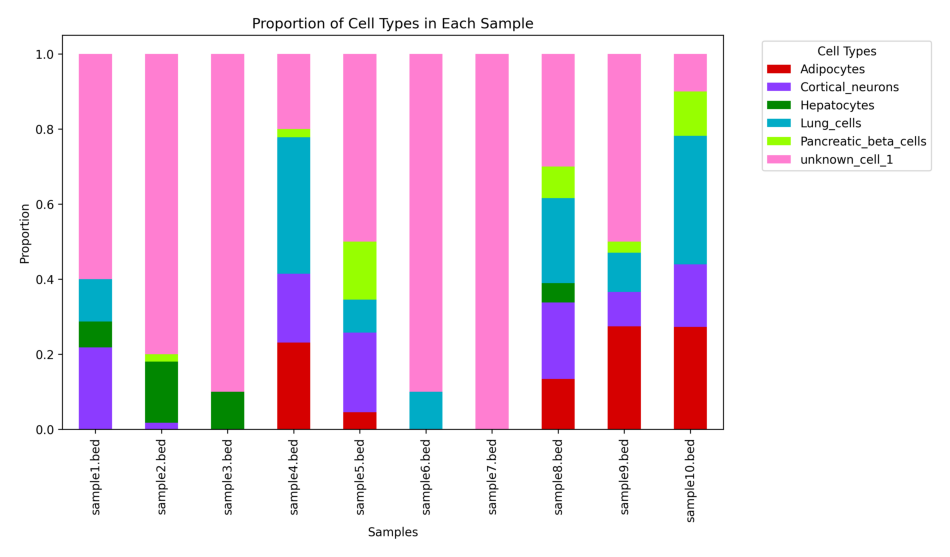

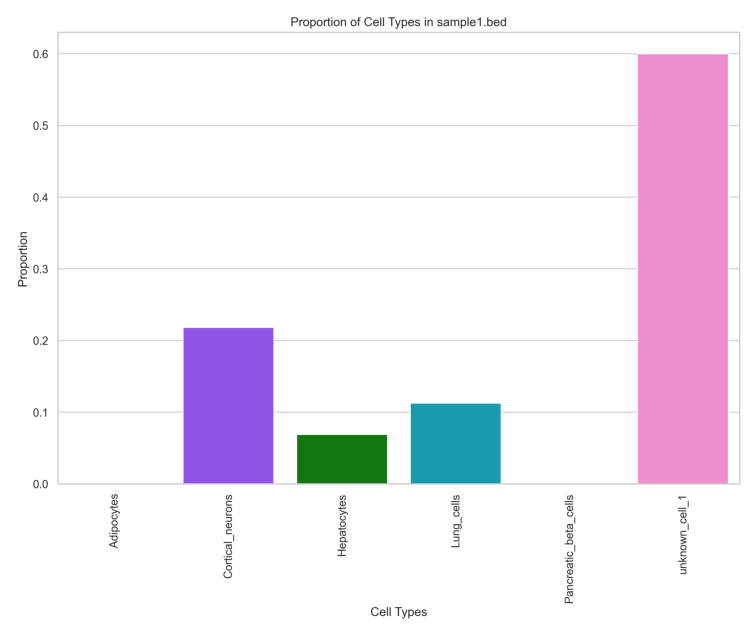

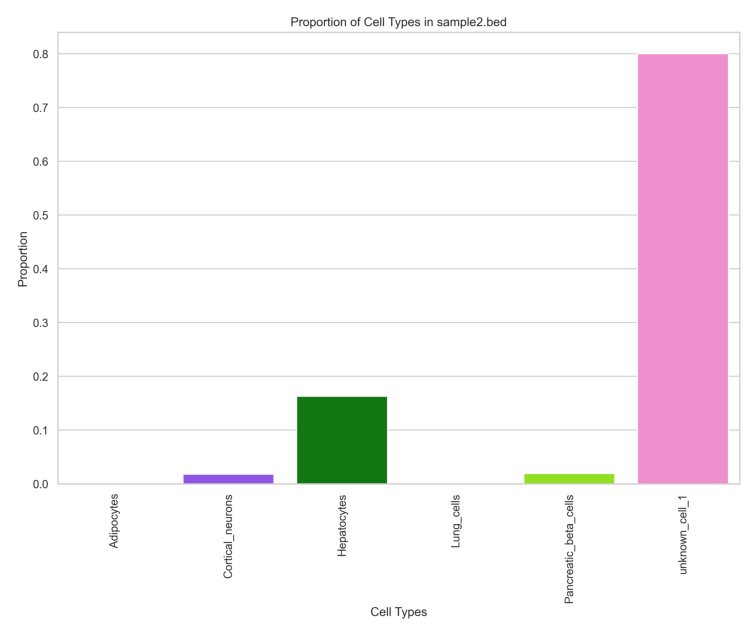

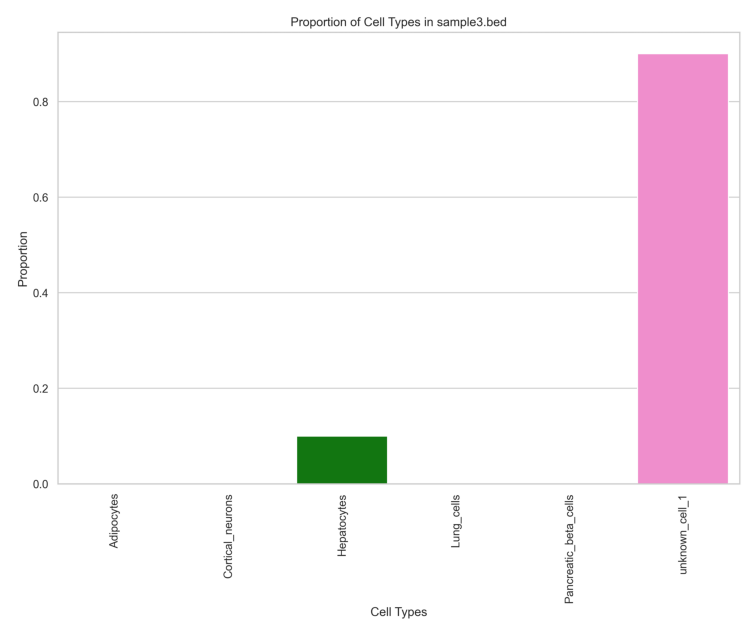

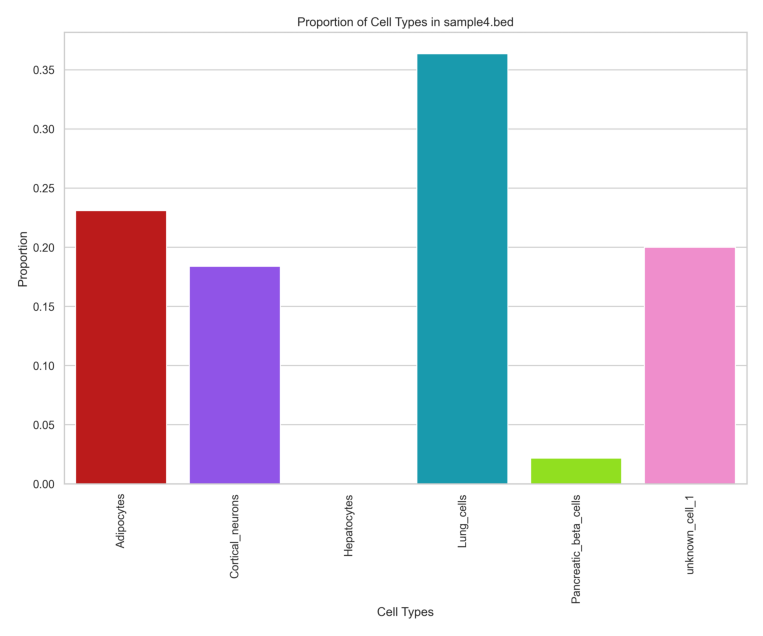

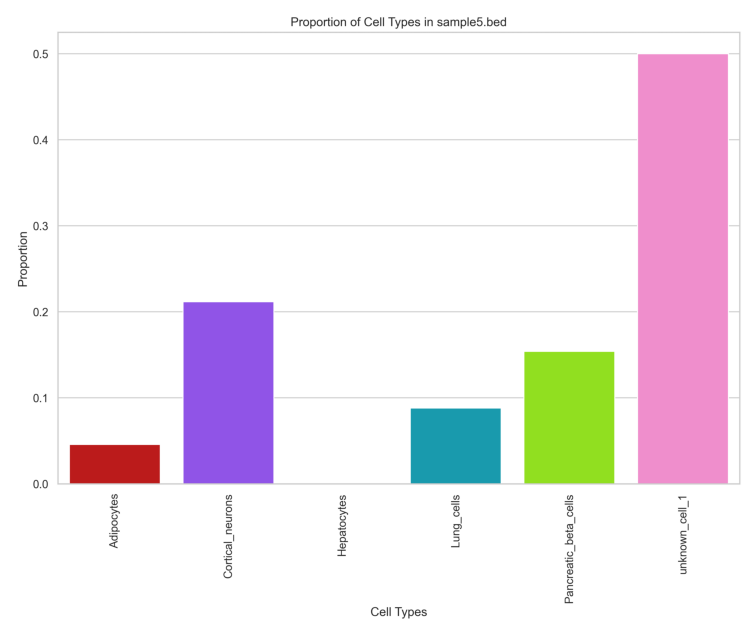

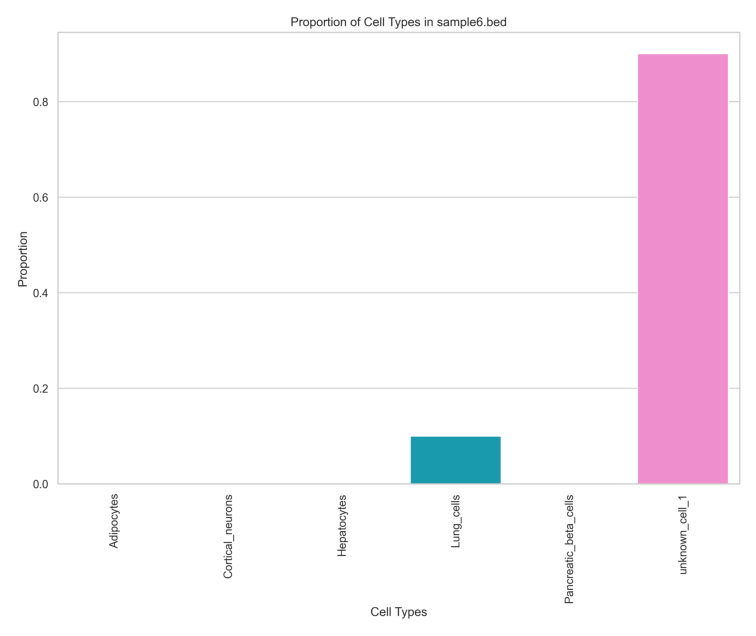

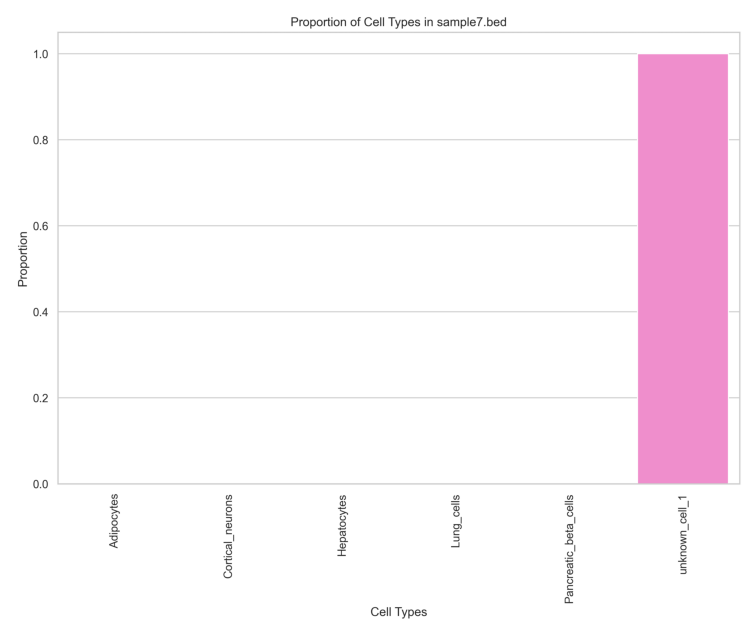

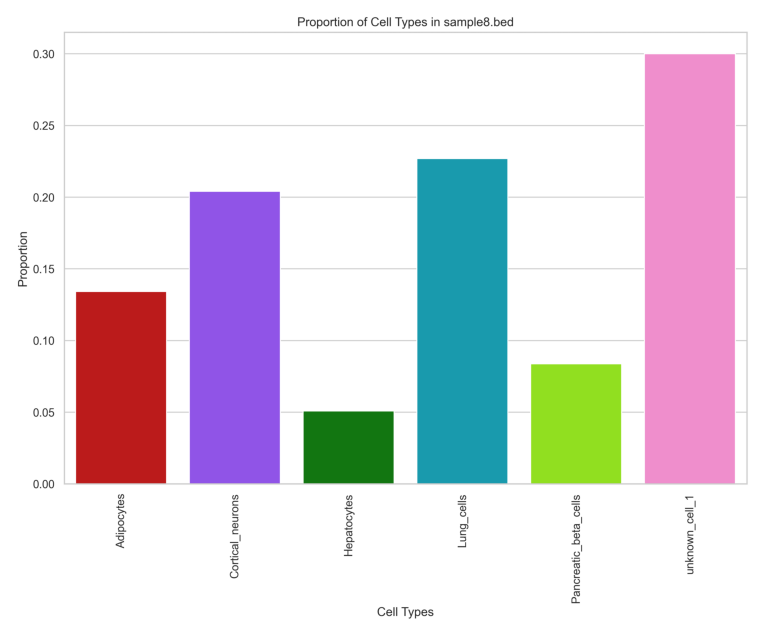

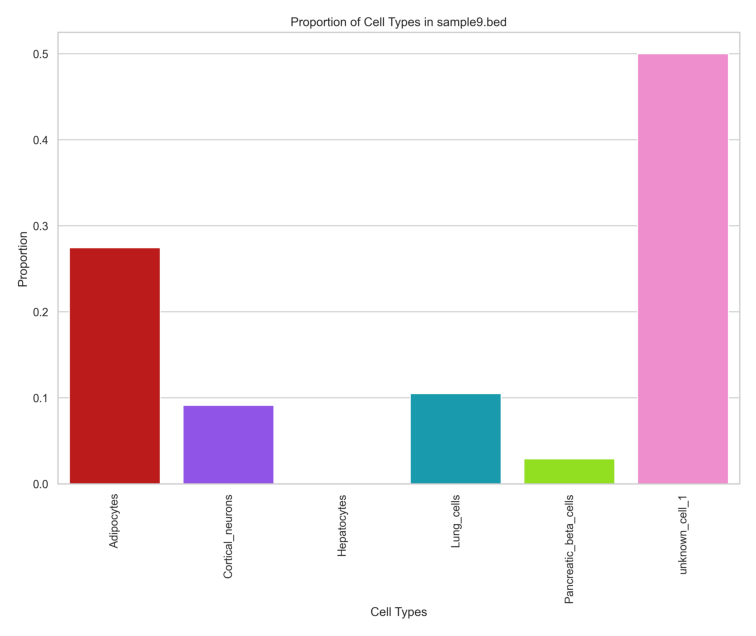

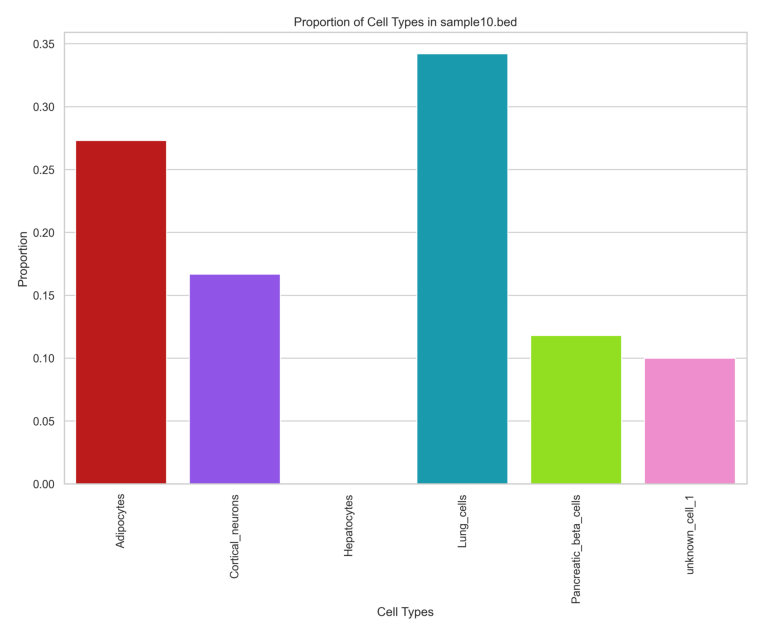

In [11]:
img = mpimg.imread('purity/plots/proportions_stackedbar.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  
plt.show()

for i in range(10):
    img = mpimg.imread('purity/plots/proportions_bar_sample' + str(i + 1) + '.png')
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

### Bootstrap confidence intervals

To obtain bootstrap confidence intervals, one can use the `--confidence` flag with the first argument being the confidence level in percentage (number between 0 and 100), and the second the number of boostrap iterations. 

In [12]:
!demethify \
    --ref output_gen/ref_matrix.bed \
    --methfreq output_gen/sample{1..10}.bed \
    --nbunknown 1 \
    --confidence 95 2500 \
    --outdir ci \
    --bedmethyl \
    --plot

     
    ____                      __  __    _ ____     
   / __ \___  ____ ___  ___  / /_/ /_  (_) __/_  __
  / / / / _ \/ __ `__ \/ _ \/ __/ __ \/ / /_/ / / /
 / /_/ /  __/ / / / / /  __/ /_/ / / / / __/ /_/ / 
/_____/\___/_/ /_/ /_/\___/\__/_/ /_/_/_/  \__, /  
                                          /____/   

Creating directory /Users/mbourdim/Desktop/tfk/DeMethify/test/ci to store results
100%|███████████████████████████████████████| 2500/2500 [00:53<00:00, 46.47it/s]
All demethified! Results in /Users/mbourdim/Desktop/tfk/DeMethify/test/ci
Plots generated in /Users/mbourdim/Desktop/tfk/DeMethify/test/ci/plots


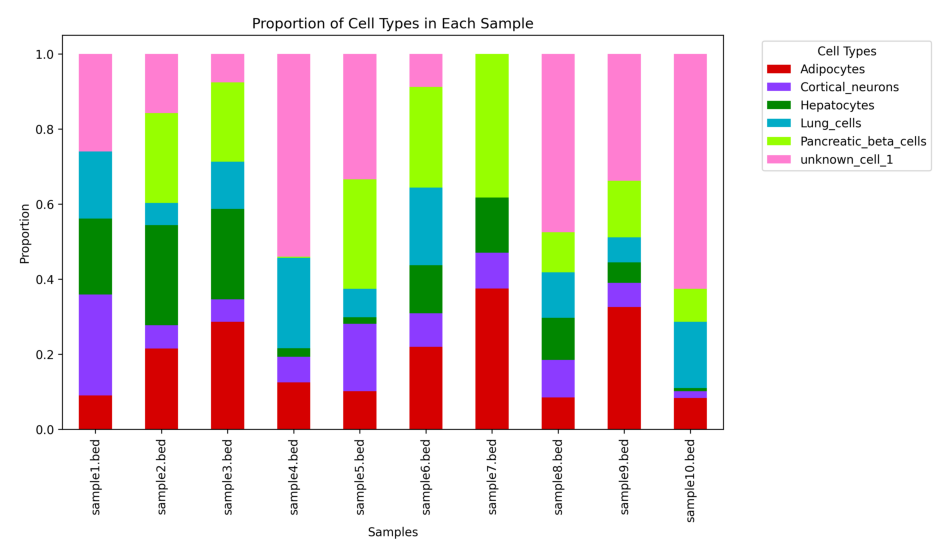

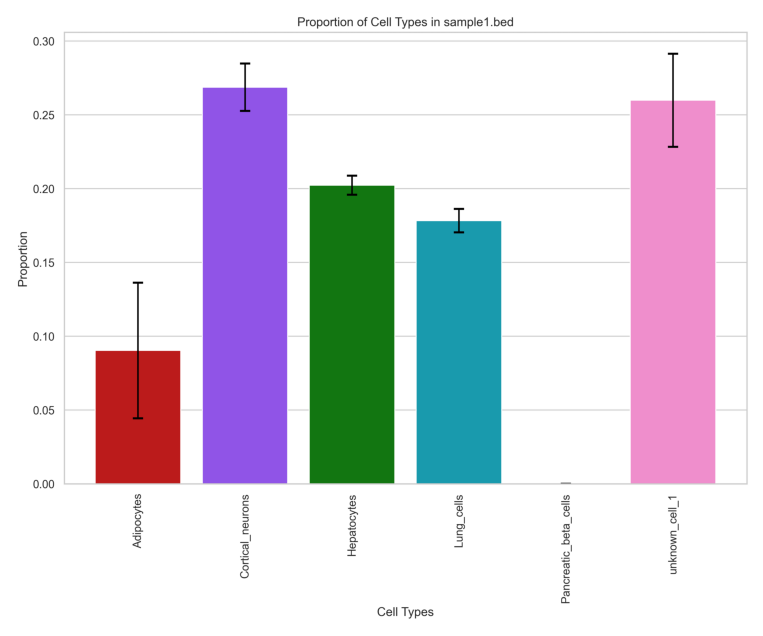

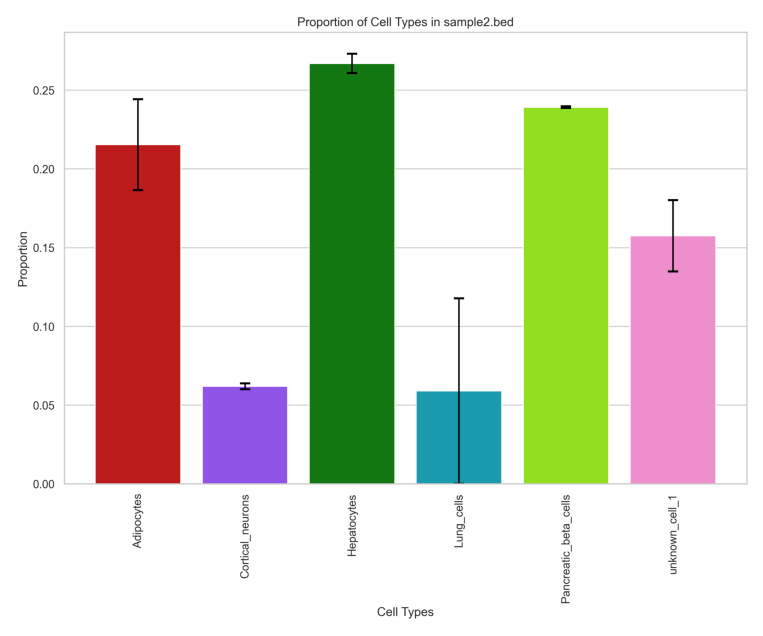

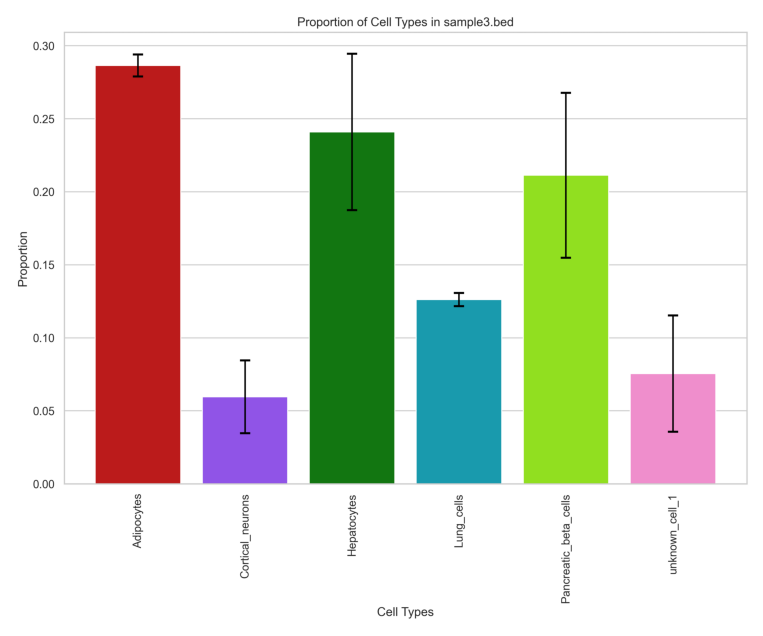

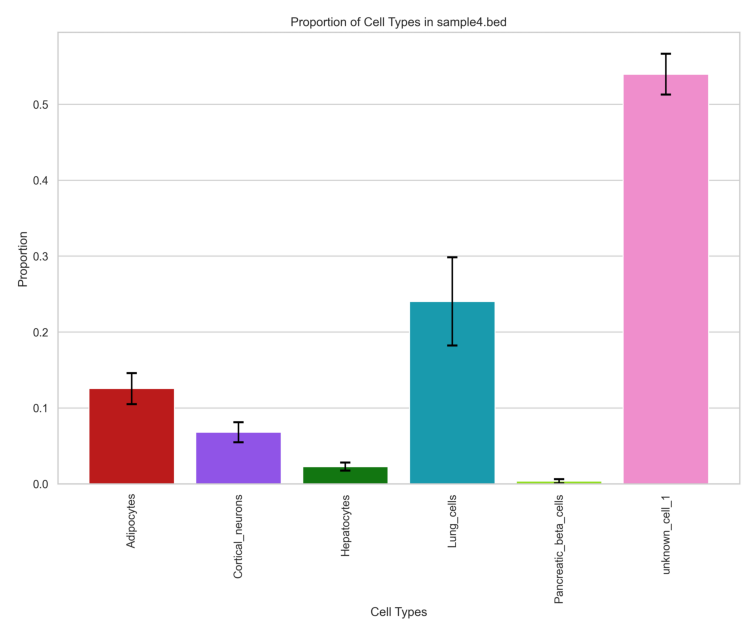

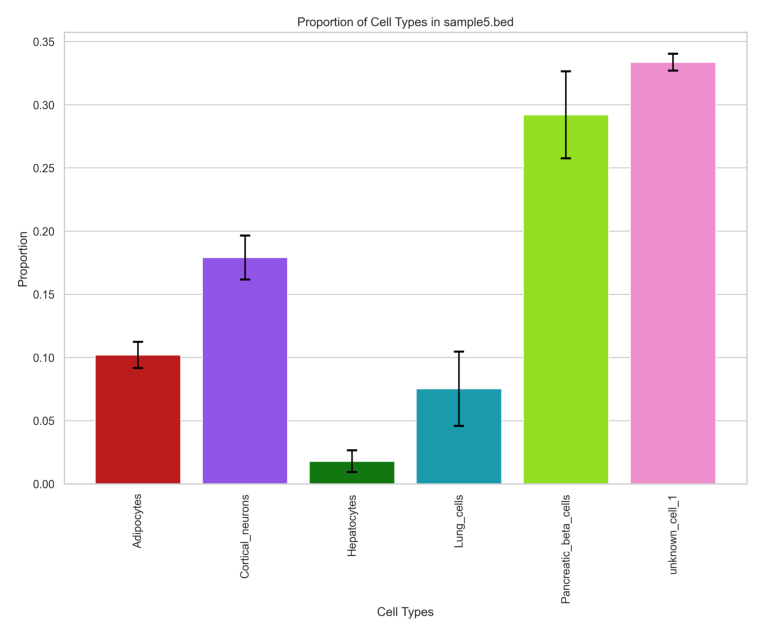

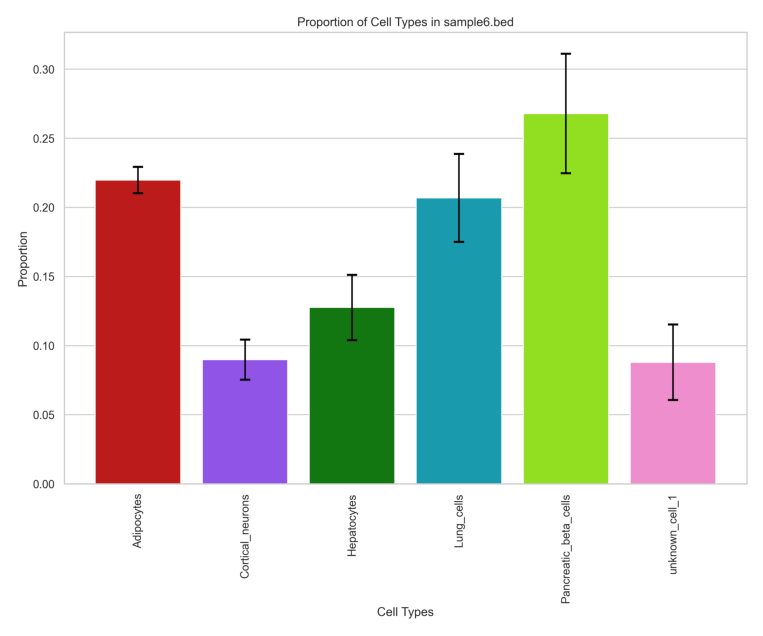

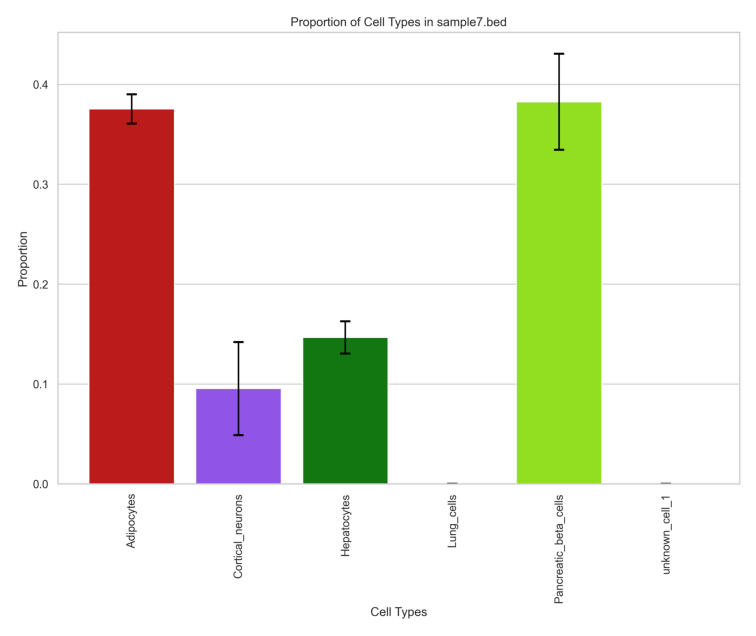

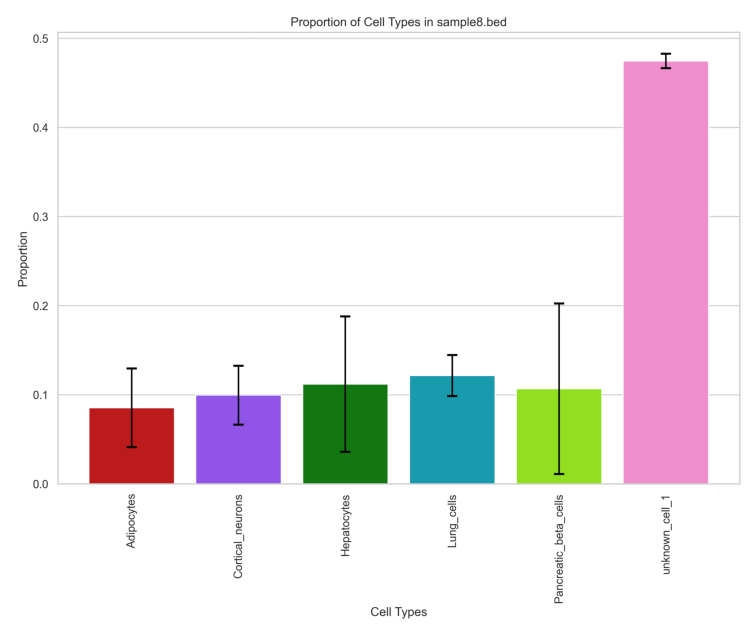

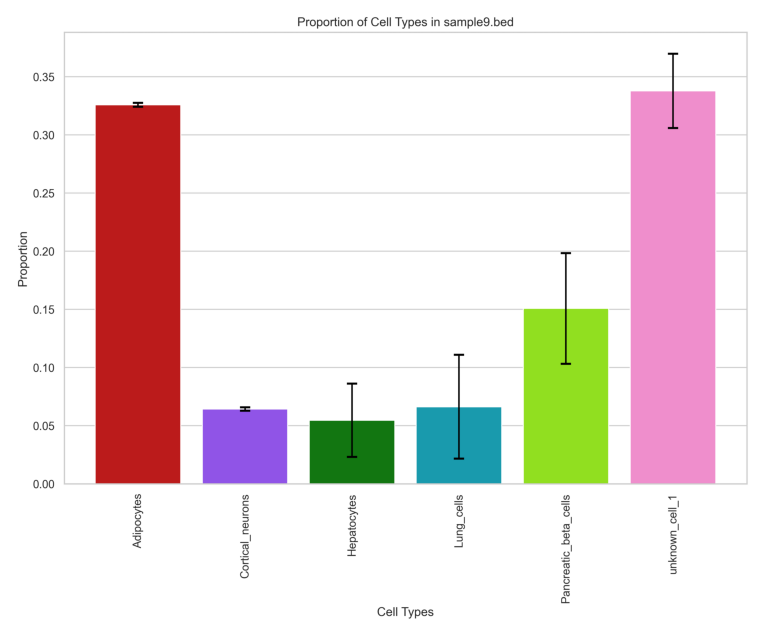

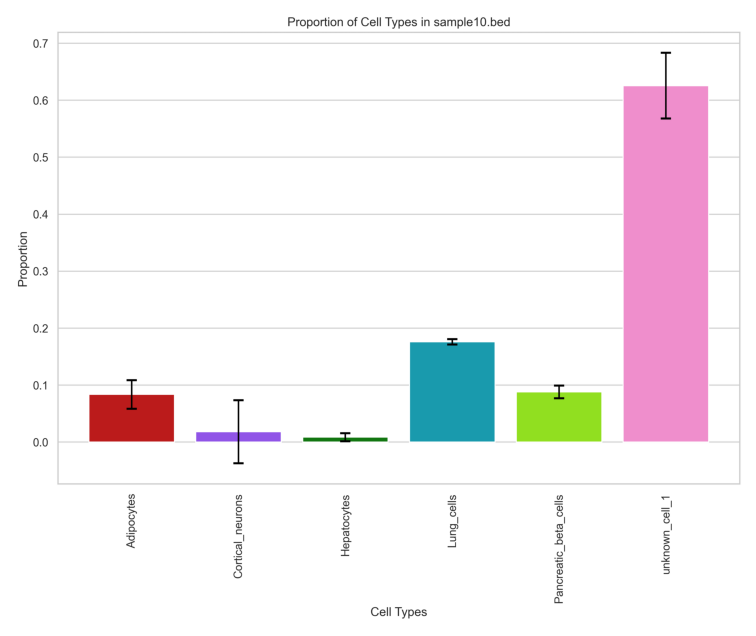

In [13]:
img = mpimg.imread('ci/plots/proportions_stackedbar.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  
plt.show()

for i in range(10):
    img = mpimg.imread('ci/plots/proportions_bar_sample' + str(i + 1) + '.png')
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

### Model selection

DeMethify also includes model selection method to systematically choose the number of unknown cell types to include in the model. 

The `--ic` flag corresponds to the method used for rank selection, determining the optimal number of unknown cell types to include in the model. There are five available options:

- **`AIC`**: The corrected Akaike Information Criterion, a measure of model quality that balances goodness of fit with model complexity. Lower values indicate better models.
- **`BIC`**: The corrected Bayesian Information Criterion, similar to AIC but imposes a stronger penalty on model complexity, favoring simpler models.
- **`CCC`**: Brunet's Cophenetic Correlation Coefficient method, which evaluates the consistency of clustering assignments across multiple runs.
- **`BCV`**: An adapted version of Owen and Perry's bi-cross-validation method for matrix factorization, which assesses the model’s predictive performance using held-out portions of the data.
- **`minka`**: An adapted version of the Minka-PCA method, which selects the rank by maximizing the log-likelihood of the residual variance.

In general, the most appropriate method depends on the structure of your data and the extent to which the methylation profiles of cell types are non-orthogonal. When methylation profiles are closer to orthogonal (e.g., CpG sites are selected such that methylation almost completely differs across cell types), the `minka` method has been observed to provide more accurate results. However, in more typical non-orthogonal cases, it is unclear whether any model selection method is consistently accurate.

If you are unsure which method to use, running several methods (e.g., `BIC`, `AIC`, and `minka`) and comparing their outputs may be a helpful approach.


In [14]:
!demethify \
    --ref output_gen/ref_matrix.bed \
    --methfreq output_gen/sample{1..10}.bed \
    --bedmethyl \
    --ic AIC \
    --outdir model_selection \
    --plot

     
    ____                      __  __    _ ____     
   / __ \___  ____ ___  ___  / /_/ /_  (_) __/_  __
  / / / / _ \/ __ `__ \/ _ \/ __/ __ \/ / /_/ / / /
 / /_/ /  __/ / / / / /  __/ /_/ / / / / __/ /_/ / 
/_____/\___/_/ /_/ /_/\___/\__/_/ /_/_/_/  \__, /  
                                          /____/   

Creating directory /Users/mbourdim/Desktop/tfk/DeMethify/test/model_selection to store results
100%|███████████████████████████████████████████| 25/25 [00:06<00:00,  3.60it/s]
All demethified! Results in /Users/mbourdim/Desktop/tfk/DeMethify/test/model_selection
Plots generated in /Users/mbourdim/Desktop/tfk/DeMethify/test/model_selection/plots


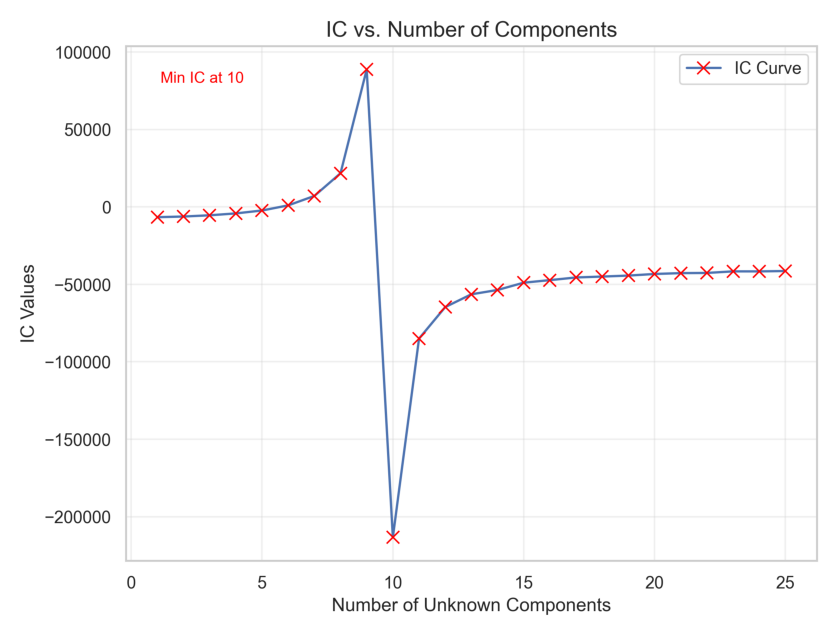

In [15]:
img = mpimg.imread('model_selection/plots/ic_plot.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  
plt.show()

## Miscellaneous recommendations

- The deconvolution problem with an unknown cell type is non-identifiable for only one sample, so DeMethify with nbunknown >= 1 is better used with a number of samples of at least 2!
    - In the situation where there are several samples at once, they're assumed to share the same "unknown" methylation profile, or at least a similar one! This is quite a strong assumption.
    - One sample deconvolution with purity information has been tried with some relative succes for denoising though. 
- For the basic partial-reference based situation 10000, 20 seem to work well for the outer and inner loop iterations, for the case where purity is known and specified 100, 500, is much better. The algorithms are different. 
- Even though it can be time-intensive, it is generally recommended in the literature to use 1000-5000 iterations for the bootstrap confidence interval algorithm, and to go as high as possible the higher the confidence level.
- Initialisation methods seems to not differ by a significant margin in terms of accuracy and the `uniform_` one which is the default initalisation method in DeMethify is the simplest and least computationally intensive so in most situations it is recommended to use this one. The `ICA`one in particular is very computationally intensive and is not better than others, even though it's been considered as such according to some standards for NMF algorithms. 
- It is not clear if model selection methods are always accurate in the non-orthogonal case which is the common case for cell types methylation profiles, but when it is close to orthogonal (CpG sites are selected methylation almost totally differ across cell types) `minka` method seems to be more accurate. 